In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

In [3]:
# Load the MNIST dataset
(x_train, y_train_lable), (x_test, y_test_lable) = mnist.load_data()

In [4]:
# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Reshape and normalize train images
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0    # Reshape and normalize test images
y_train = tf.keras.utils.to_categorical(y_train_lable, num_classes=10)    # One-hot encode train labels
y_test = tf.keras.utils.to_categorical(y_test_lable, num_classes=10)      # One-hot encode test labels


In [5]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [51]:
# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [53]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=8, validation_split=0.1)

Epoch 1/5
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.9935 - loss: 0.0209 - val_accuracy: 0.9892 - val_loss: 0.0372
Epoch 2/5
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.9952 - loss: 0.0137 - val_accuracy: 0.9900 - val_loss: 0.0465
Epoch 3/5
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.9968 - loss: 0.0110 - val_accuracy: 0.9915 - val_loss: 0.0418
Epoch 4/5
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.9971 - loss: 0.0089 - val_accuracy: 0.9908 - val_loss: 0.0616
Epoch 5/5
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.9977 - loss: 0.0073 - val_accuracy: 0.9898 - val_loss: 0.0548


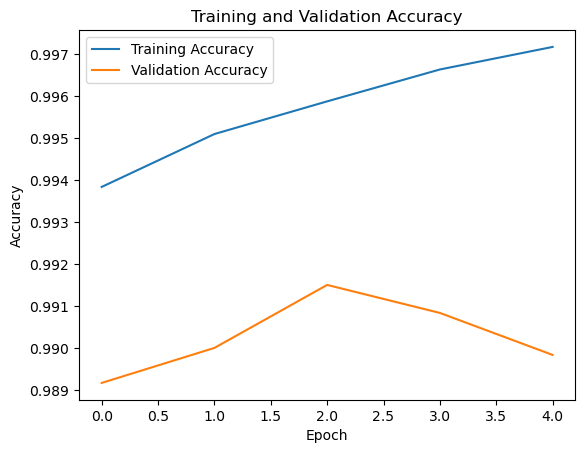

In [55]:
import numpy as np
import matplotlib.pyplot as plt

model.save('Minst.keras')

plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
y_pred = model.predict(x_test)

# Convert predictions from one-hot encoded vectors to class numbers
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1score = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1score:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Precision: 0.9887
Recall: 0.9886
F1 Score: 0.9886


In [64]:
# Compute precision, recall, and F1-score for each class
precision = precision_score(y_true_classes, y_pred_classes, average=None)
recall = recall_score(y_true_classes, y_pred_classes, average=None)
f1score = f1_score(y_true_classes, y_pred_classes, average=None)

# Print class-wise metrics
for class_label in range(1, len(precision) + 1):
    print(f"Class {class_label}:")
    print(f"Precision: {precision[class_label - 1]:.4f}")
    print(f"Recall: {recall[class_label - 1]:.4f}")
    print(f"F1 Score: {f1score[class_label - 1]:.4f}\n")

# Print overall classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

Class 1:
Precision: 0.9879
Recall: 0.9980
F1 Score: 0.9929

Class 2:
Precision: 0.9947
Recall: 0.9938
F1 Score: 0.9943

Class 3:
Precision: 0.9903
Recall: 0.9893
F1 Score: 0.9898

Class 4:
Precision: 0.9843
Recall: 0.9931
F1 Score: 0.9887

Class 5:
Precision: 0.9949
Recall: 0.9878
F1 Score: 0.9913

Class 6:
Precision: 0.9630
Recall: 0.9933
F1 Score: 0.9779

Class 7:
Precision: 0.9947
Recall: 0.9718
F1 Score: 0.9831

Class 8:
Precision: 0.9893
Recall: 0.9903
F1 Score: 0.9898

Class 9:
Precision: 0.9948
Recall: 0.9846
F1 Score: 0.9897

Class 10:
Precision: 0.9900
Recall: 0.9832
F1 Score: 0.9866

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.96      0.99      0.98       8

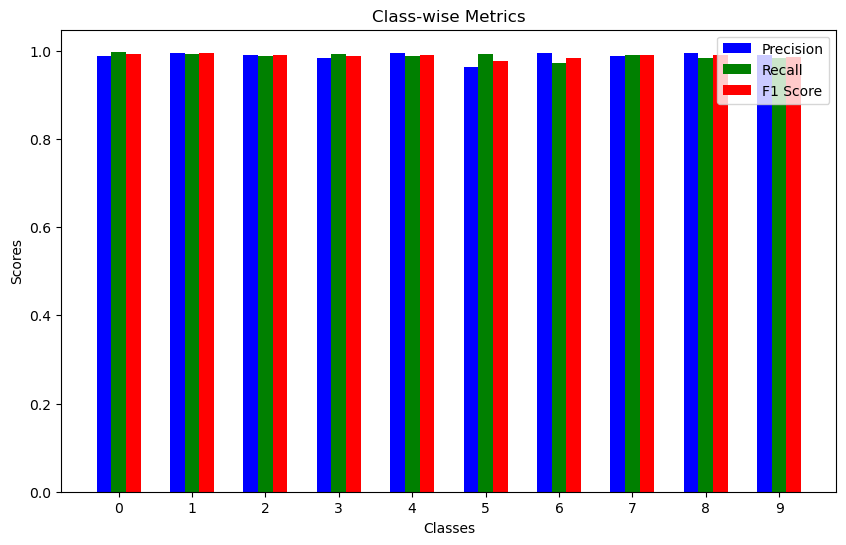

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual metrics)
classes = ['0','1', '2', '3', '4','5','6','7','8','9']

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.2

# Plot bars
ax.bar(np.arange(len(classes)), precision, width, label='Precision', color='b')
ax.bar(np.arange(len(classes)) + width, recall, width, label='Recall', color='g')
ax.bar(np.arange(len(classes)) + 2 * width, f1score, width, label='F1 Score', color='r')

# Customize plot
ax.set_xticks(np.arange(len(classes)) + width)
ax.set_xticklabels(classes)
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Class-wise Metrics')
ax.legend()

# Show the plot
plt.show()


In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
model = load_model('Minst.keras')

In [7]:
from sklearn.preprocessing import normalize

def extract_features(image, model):
    input_image = np.expand_dims(image, axis=0)
    features = model.predict(input_image)
    features = features.flatten()
    features = normalize(features.reshape(1, -1))  # Normalize for distance calculation
    return features

In [8]:
feature_vector=[]
for image in x_test[:200]:
    feature_vector.append(extract_features(image,model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━

In [9]:
print(feature_vector[0])
print(len(feature_vector))

[[9.2545615e-23 1.7686361e-17 5.1377031e-19 1.3044691e-16 9.5360577e-17
  1.2346933e-16 1.5442683e-25 1.0000000e+00 8.0979690e-16 1.5930231e-11]]
200


0


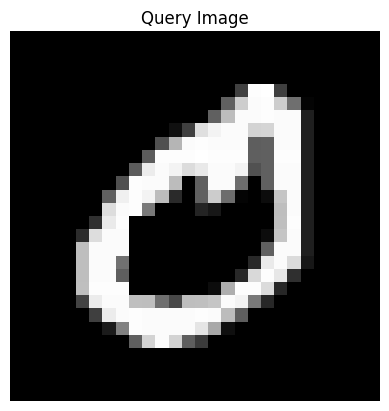

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Retrived Image


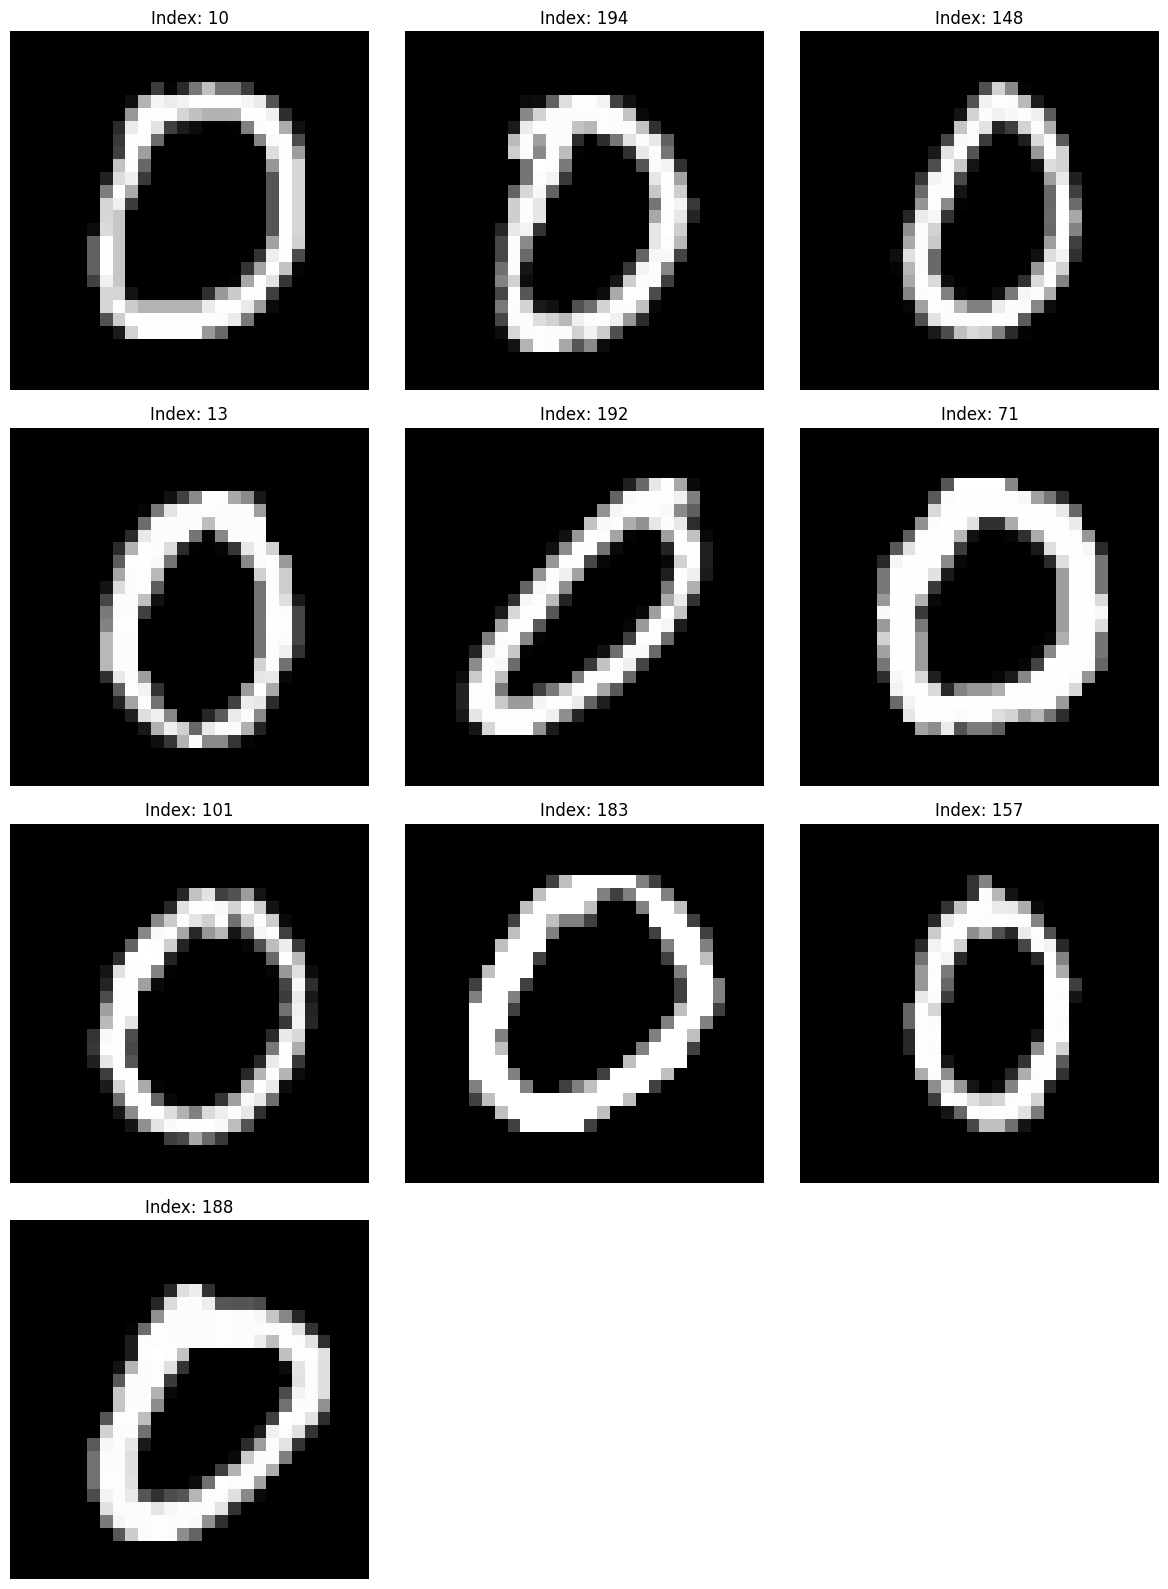

Indices of similar images: [ 10 194 148  13 192  71 101 183 157 188]


In [18]:
# Content-Based Image Retrieval (CBIR)
def retrieve_similar_images(query_image, feature_vector, model, top_k=10):
    query_feature = extract_features(query_image,model)
    
    # Calculate similarity (Euclidean distance)
    distances=[]
    for feature in feature_vector:
        distances.append(np.linalg.norm(query_feature - feature))
        
    sorted_indices = np.argsort(distances)
    # Retrieve top k similar images
    return sorted_indices[:top_k]


def display_images(image_indices):
    cols = 3  # Adjust the number of columns as needed
    rows = int(len(image_indices) / cols) + (len(image_indices) % cols > 0)
    plt.figure(figsize=(12, 4 * rows))
    for i, image_index in enumerate(image_indices):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(x_test[image_index].squeeze(), cmap='gray')
        #plt.title("Class: "+str(y_test_lable[image_index]))
        plt.title("Index: "+str(image_index))
        plt.axis('off')
    plt.tight_layout()
    plt.show()



# Example usage of CBIR
query_image = x_train[21]  # This should be the image you want to retrieve similar images for
print(y_train_lable[21])
plt.imshow(query_image.squeeze(), cmap='gray')
plt.title("Query Image")
plt.axis('off')
plt.show()


similar_images_indices = retrieve_similar_images(query_image, feature_vector, model)

print("Retrived Image")
display_images(similar_images_indices)
print(f"Indices of similar images: {similar_images_indices}")